# Consumo de servicio web para el análisis de datos
## Proyecto Final : Curso Python - Intel

### Por: Laura Irán González Ojeda


El presente script tiene como objetivo mostrar algunos de los temas que se revisaron en el Curso de Python para corroborar los conocimientos adquiridos. 
    
### Justificación

Los features que he elegido implementar para el presente proyecto son:
- Consumo de un Servicio Web para extracción de datos 
- Almacenamiento de datos en un archivo csv, lectura de archivo csv y limpieza de datos
- Manejo de Dataframes
- Creación de gráficas para el análisis de los datos adquiridos 

El motivo de la consideración de estos temas es porque es de mi interés consolidar los conocimientos de análisis de datos con Python para posteriormente introducirme en temas más avanzados como Machine Learning y Artificial Intelligence. 

In [7]:
# Importacion de librerias a considerar en este proyecto
import requests
from os import remove
from os import path
import csv
import pandas as pd
import matplotlib.pyplot as plt


#Borrar el archivo donde se almacenaran los datos, para tener el ambiente limpio si existieron previas corridas
if path.exists("data.csv"):
    remove('data.csv')

In [2]:
# Solicitar la peticion de los datos al servicio web y obtener la respuesta
results = 5000
page = 1
seed = "123"
nat = ["us", "gb", "fr"]

response = requests.get(f"https://randomuser.me/api?results={results}&page={page}&seed={seed}&nat={','.join(nat)}")
data = response.json()

In [3]:
# Insercion de los Headers del CSV        
headerList = ["Name", "LastName", "Gender","email","Nationality"]
with open('data.csv', 'w') as file:
    dw = csv.DictWriter(file, delimiter=',', fieldnames=headerList)
    dw.writeheader()

# Se obtienen los resultados de la respuesta para almacenarlos limpios en un archivo CSV
for user in data["results"]:
    a=user["name"]["first"],user["name"]["last"],user["gender"],user["email"],user["nat"]
    with open('data.csv', 'a+', encoding='utf-8') as file:
        file.write(str(a).replace("(", "").replace(")", "").replace("'", "").replace(" ", "")+'\n')

In [4]:
#Mostrar los datos extraidos del csv en un data frame
df = pd.read_csv ('data.csv')
print (df)

          Name  LastName  Gender                         email Nationality
0        Jared  Caldwell    male    jared.caldwell@example.com          US
1     Victoria   Leclerc  female  victoria.leclerc@example.com          FR
2        Léane   Rolland  female     leane.rolland@example.com          FR
3          Jar    Chavez    male        jar.chavez@example.com          US
4     Clarence     Dixon    male    clarence.dixon@example.com          US
...        ...       ...     ...                           ...         ...
4995     Maëly   Olivier  female     maely.olivier@example.com          FR
4996   Alberto    Moreno    male    alberto.moreno@example.com          US
4997   Garance    Durand  female    garance.durand@example.com          FR
4998      Dean     Allen    male        dean.allen@example.com          GB
4999      Lucy   Perkins  female      lucy.perkins@example.com          US

[5000 rows x 5 columns]


In [5]:
#Realizar calculos de sumatorias y counts sobre el genero y la nacionalidad de los usuarios
groupby_sum1 = df.groupby(['Gender']).sum()
groupby_sum2 = df.groupby(['Nationality']).sum()

groupby_count1 = df.groupby(['Gender']).count()
groupby_count2 = df.groupby(['Nationality']).count()

# Imprimir resultados
print ('Sum of values, grouped by the Gender: ' + str(groupby_sum1))
print ('Sum of values, grouped by the Nationality: ' + str(groupby_sum2))

print ('Count of values, grouped by the Gender: ' + str(groupby_count1))
print ('Count of values, grouped by the Nationality: ' + str(groupby_count2))

Sum of values, grouped by the Gender: Empty DataFrame
Columns: []
Index: [female, male]
Sum of values, grouped by the Nationality: Empty DataFrame
Columns: []
Index: [FR, GB, US]
Count of values, grouped by the Gender:         Name  LastName  email  Nationality
Gender                                    
female  2515      2515   2515         2515
male    2485      2485   2485         2485
Count of values, grouped by the Nationality:              Name  LastName  Gender  email
Nationality                               
FR           1713      1713    1713   1713
GB           1630      1630    1630   1630
US           1657      1657    1657   1657


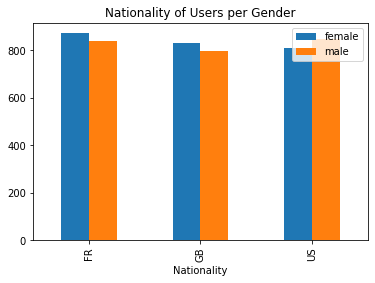

In [6]:
#Graficar los resultados -> Grafica para visualizar las nacionalidades de los usuarios agrupados por Genero
df=df.groupby(['Nationality','Gender']).size()
df=df.unstack()
df.plot(kind='bar')
plt.title('Nationality of Users per Gender')
plt.legend()
plt.show()